---

## Classification using Scikitlearn
The palmer penguin dataset is excellent for EDA and Classification. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

# Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

# Data Inspection

In [ ]:
#inspect data
penguins.info()
print(penguins)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
    species_short     island  culmen_length_mm  culmen_depth_mm  \
0          Adelie  Torgersen              39.1             18.7   
1          Adelie  Torgersen              39.5             17.4   
2          Adelie  Torgersen              40.3             18.0   
3          Adelie  Torgersen               NaN              NaN   
4          Adelie  Torgersen              36.7             19.3   
..       

In [ ]:
print(penguins["species_short"].unique())
print(penguins["island"].unique())


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [ ]:
penguins_clean = penguins.dropna(how = "any")
penguins_clean.info()
penguins_clean.reset_index(inplace=True, drop = True)
penguins_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


#Exploratory Data Analysis (EDA)

Text(86.875, 0.5, 'culmen length')

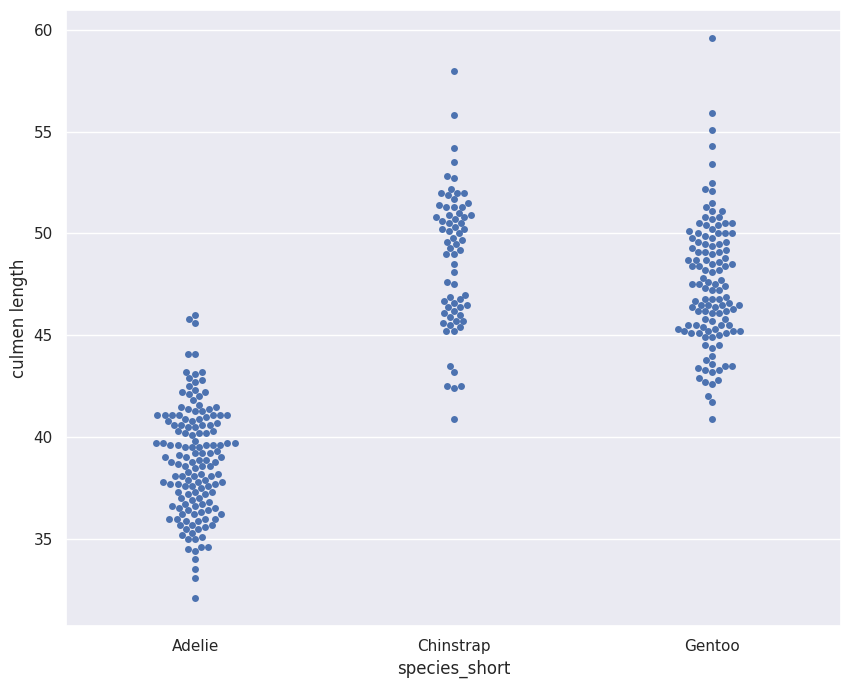

In [ ]:
sns.swarmplot(x = "species_short", y = "culmen_length_mm", data = penguins_clean)
plt.ylabel("culmen length")

Text(77.25, 0.5, 'flipper length')

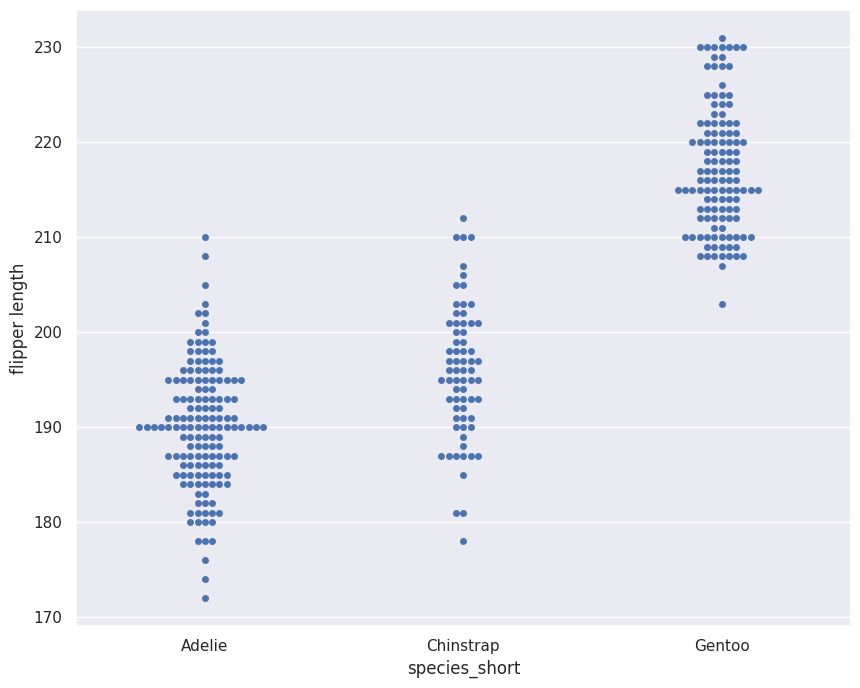

In [ ]:
sns.swarmplot(x= "species_short", y = "flipper_length_mm", data = penguins_clean)
plt.ylabel("flipper length")

<Axes: xlabel='species_short', ylabel='body_mass_g'>

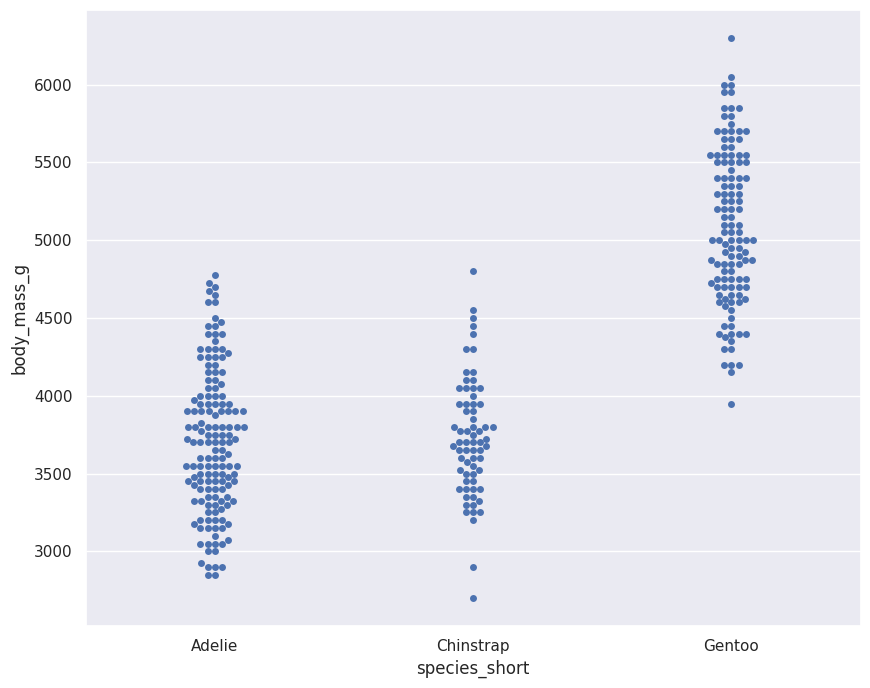

In [ ]:
sns.swarmplot(x= "species_short", y = "body_mass_g", data = penguins_clean)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='species_short', ylabel='island'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


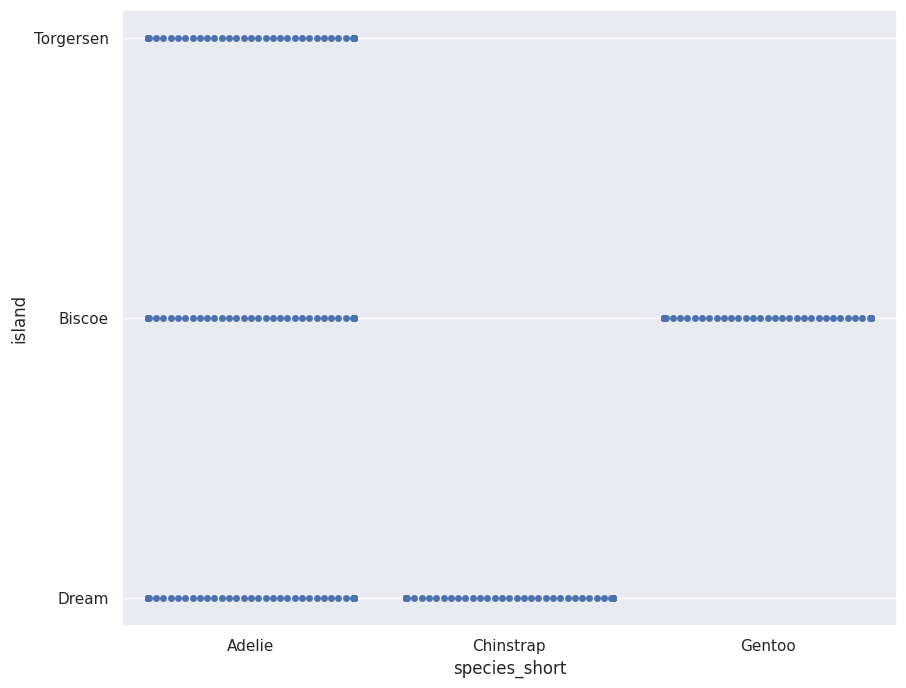

In [ ]:
sns.swarmplot(x= "species_short", y = "island", data = penguins_clean)


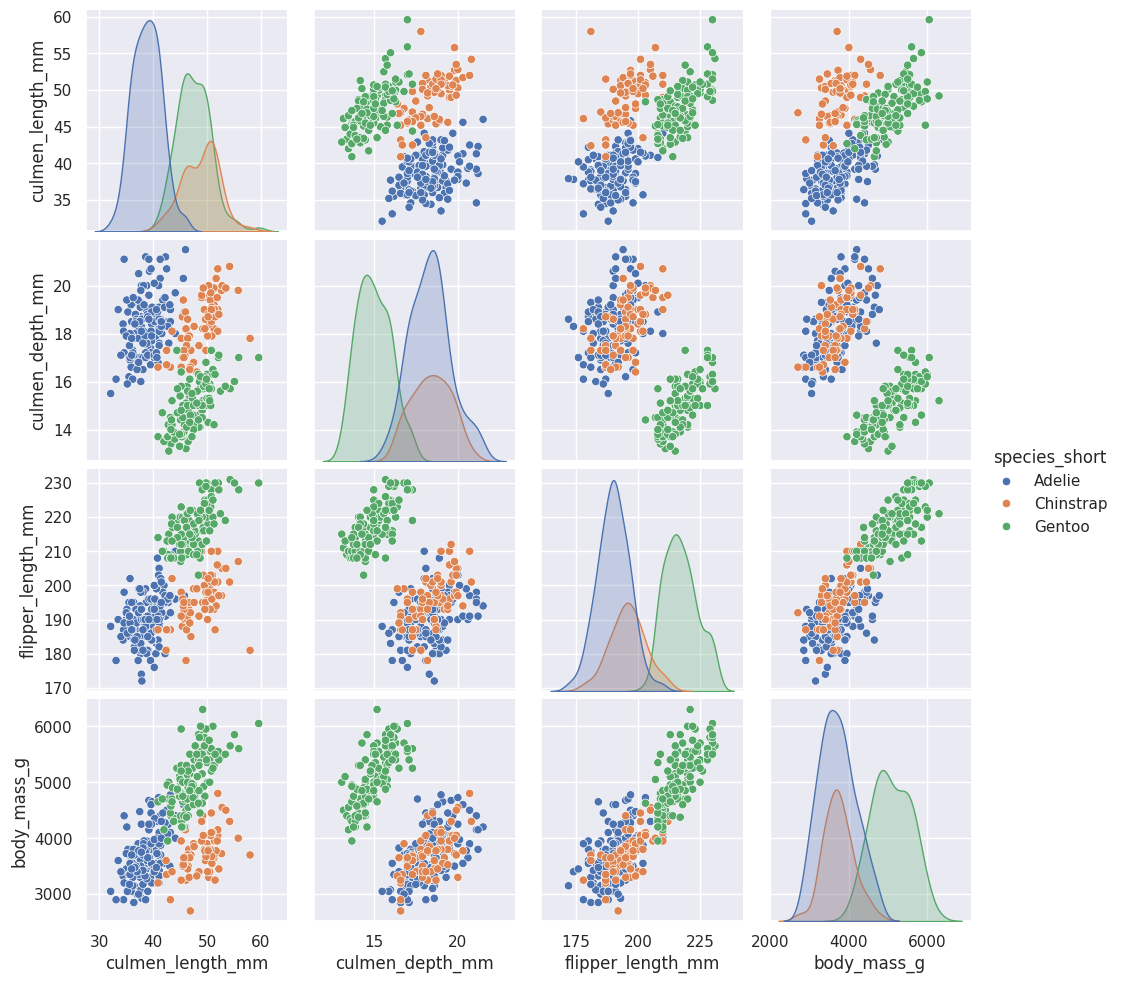

In [ ]:
sns.pairplot(penguins_clean, hue='species_short')

<Axes: >

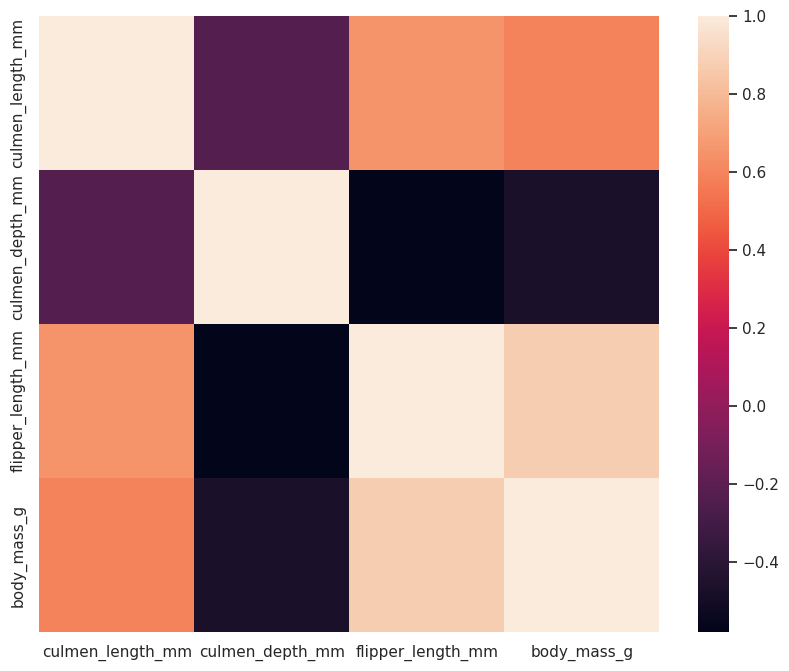

In [ ]:
penguins_num = penguins_clean[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm","body_mass_g"]]
sns.heatmap(penguins_num.corr())

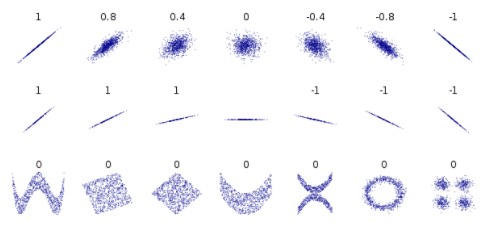

Adelie has smaller culmen length than the other two species
Gentoo has larger flipper length than the other two species
Gentoo are also heavier than the other two species
Adelie are the only penguins living on the three islands, chinstrap only on Dream and Gentoo only on Biscoe

Flipper length and body mass  positevly correlated length features > bigger animal, need for stronger flippers and larger beak to eat more

#Data prep

encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

penguins_clean["sex"] = encoder.fit_transform(penguins_clean["sex"])
penguins_clean["island"] = encoder.fit_transform(penguins_clean["island"])
penguins_clean["species_short"] = encoder.fit_transform(penguins_clean["species_short"])
penguins_clean

<ipython-input-12-d3978d629eae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["sex"] = encoder.fit_transform(penguins_clean["sex"])
<ipython-input-12-d3978d629eae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["island"] = encoder.fit_transform(penguins_clean["island"])
<ipython-input-12-d3978d629eae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,36.7,19.3,193.0,3450.0,1
4,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
329,2,0,47.2,13.7,214.0,4925.0,1
330,2,0,46.8,14.3,215.0,4850.0,1
331,2,0,50.4,15.7,222.0,5750.0,2
332,2,0,45.2,14.8,212.0,5200.0,1


scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = penguins_clean.loc[:,"island":"sex"]
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.89260388, -0.89765322,  0.78348666, -1.42952144, -0.57122888,
         0.98823488],
       [ 1.89260388, -0.82429023,  0.12189602, -1.07240838, -0.50901123,
        -0.98823488],
       [ 1.89260388, -0.67756427,  0.42724555, -0.42960487, -1.19340546,
        -0.98823488],
       ...,
       [-0.91063202,  1.17485108, -0.74326098,  1.49880565,  1.91747742,
         0.98823488],
       [-0.91063202,  0.22113229, -1.20128527,  0.78457953,  1.23308319,
        -0.98823488],
       [-0.91063202,  1.08314735, -0.53969463,  0.85600214,  1.48195382,
         0.98823488]])

In [ ]:
import numpy as np
y = np.asarray(penguins_clean["species_short"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)



#Train model

In [ ]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

Logistic Regression

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)



[0.98148148 1.         1.         1.         0.98113208]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


In [ ]:
target_names_penguins = encoder.inverse_transform(list(set(y_test)))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names_penguins))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
print(target_names_penguins)
!pip install -qq -U mlxtend

['Adelie' 'Chinstrap' 'Gentoo']
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.2 MB/s eta 0:00:00


(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

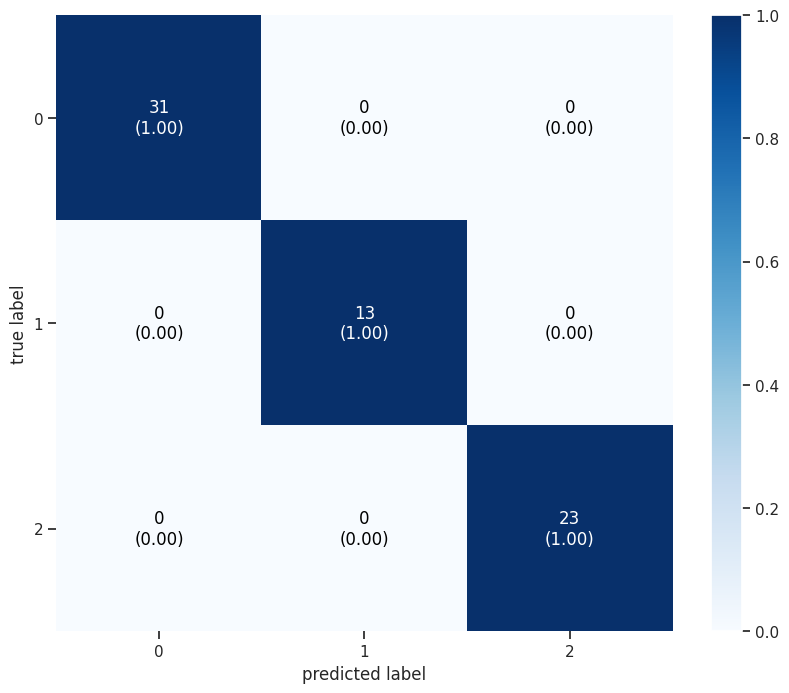

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=confmatrix,colorbar=True,show_absolute=True,show_normed=True,hide_spines = True) #class_names= target_names_penguins    for some reason class_names throws an error

XG boost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98148148 1.         0.98113208 0.98113208 0.98113208]
1.0


In [ ]:
# Performance evaluation using the classification_report
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names=target_names_penguins)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

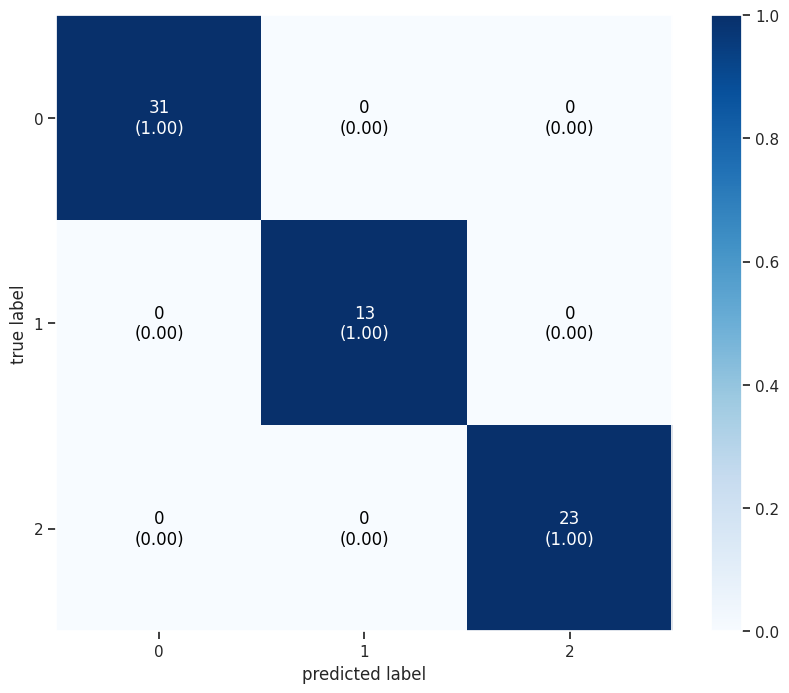

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred)

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)